In [92]:
import os
path = r"C:\Users\kiril\Desktop\10.2 семестр\хакатон спб"

In [69]:
# Чтение данных
import pandas as pd
data = pd.read_csv(os.path.join(path, "data_Yaroslav.tsv"), sep='\t')
data

,BindingDB Reactant_set_id,Ligand SMILES,Ligand InChI,Ligand InChI Key,BindingDB MonomerID,BindingDB Ligand Name,Target Name,Target Source Organism According to Curator or DataSource,Ki (nM),IC50 (nM),...,UniProt (SwissProt) Entry Name of Target Chain,UniProt (SwissProt) Primary ID of Target Chain,UniProt (SwissProt) Secondary ID(s) of Target Chain,UniProt (SwissProt) Alternative ID(s) of Target Chain,UniProt (TrEMBL) Submitted Name of Target Chain,UniProt (TrEMBL) Entry Name of Target Chain,UniProt (TrEMBL) Primary ID of Target Chain,UniProt (TrEMBL) Secondary ID(s) of Target Chain,UniProt (TrEMBL) Alternative ID(s) of Target Chain,pIC50
0,50237184,Cc1cccc(NC(=O)[C@H](CCCCCS)NC(=O)[C@@H]2CCCC(=...,InChI=1S/C20H29N3O3S/c1-14-7-5-8-15(13-14)21-1...,JTIATMCBWUQBGH-IRXDYDNUSA-N,50027494,CHEMBL3356916,Histone deacetylase 6,Homo sapiens,NaN,1.0,...,HDAC6_HUMAN,Q9UBN7,O94975 Q6NT75 Q7L3E5 Q96CY0,NaN,NaN,NaN,NaN,NaN,NaN,-0.00000
1,51418458,ONC(=O)c1cc(F)c2CN(CCc2c1)C1CCC1,InChI=1S/C14H17FN2O2/c15-13-7-10(14(18)16-19)6...,TWIFZMHPHFCCOU-UHFFFAOYSA-N,50573103,CHEMBL4852905,Histone deacetylase 6,Homo sapiens,NaN,1.0,...,HDAC6_HUMAN,Q9UBN7,O94975 Q6NT75 Q7L3E5 Q96CY0,NaN,NaN,NaN,NaN,NaN,NaN,-0.00000
2,51418463,CN1CC2(CCCCC2)CC[C@H]1Cc1cc(F)cc(c1)C(=O)NO,InChI=1S/C19H27FN2O2/c1-22-13-19(6-3-2-4-7-19)...,KDNQXZWMWWVUMN-KRWDZBQOSA-N,50573108,CHEMBL4846606,Histone deacetylase 6,Homo sapiens,NaN,1.0,...,HDAC6_HUMAN,Q9UBN7,O94975 Q6NT75 Q7L3E5 Q96CY0,NaN,NaN,NaN,NaN,NaN,NaN,-0.00000
3,50237182,SCCCCC[C@H](NC(=O)[C@@H]1CCCNC1=O)C(=O)Nc1ccccc1,InChI=1S/C19H27N3O3S/c23-17-15(10-7-12-20-17)1...,ILCBWDQDWOLKIQ-CVEARBPZSA-N,50027649,CHEMBL3356527,Histone deacetylase 6,Homo sapiens,NaN,1.0,...,HDAC6_HUMAN,Q9UBN7,O94975 Q6NT75 Q7L3E5 Q96CY0,NaN,NaN,NaN,NaN,NaN,NaN,-0.00000
4,51418459,Cn1c2CN(Cc3ccc(cc3F)C(=O)NO)CCc2c2ccccc12,InChI=1S/C20H20FN3O2/c1-23-18-5-3-2-4-15(18)16...,ZYAWIVYRYLKVIP-UHFFFAOYSA-N,50573104,CHEMBL4854340,Histone deacetylase 6,Homo sapiens,NaN,1.0,...,HDAC6_HUMAN,Q9UBN7,O94975 Q6NT75 Q7L3E5 Q96CY0,NaN,NaN,NaN,NaN,NaN,NaN,-0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5360,1057530,CC1(C)CCCCN1C(=O)[C@@H]1CCC(=O)N1c1ccc(-c2noc(...,InChI=1S/C21H22F4N4O3/c1-20(2)9-3-4-10-28(20)1...,XLIIHBIXVZJLSA-HNNXBMFYSA-N,504941,"(5S)-5- [(2,2- dimethyl- piperidin- 1-yl) carb...",Histone deacetylase 6,Homo sapiens,NaN,64.0,...,HDAC6_HUMAN,Q9UBN7,O94975 Q6NT75 Q7L3E5 Q96CY0,NaN,NaN,NaN,NaN,NaN,NaN,-1.80618
5361,1057627,FC(F)(F)c1nc(no1)-c1ccc(CNC2CCCCNC2=O)nc1,"InChI=1S/C15H16F3N5O2/c16-15(17,18)14-22-12(23...",NFVVUJNRHLZQJQ-UHFFFAOYSA-N,504978,"3-[({5-[5- (trifluoro- methyl)- 1,2,4-oxa- dia...",Histone deacetylase 6,Homo sapiens,NaN,64.0,...,HDAC6_HUMAN,Q9UBN7,O94975 Q6NT75 Q7L3E5 Q96CY0,NaN,NaN,NaN,NaN,NaN,NaN,-1.80618
5362,1057717,COc1cccc(NCc2ccc(cc2)-c2noc(n2)C(F)(F)F)c1,InChI=1S/C17H14F3N3O2/c1-24-14-4-2-3-13(9-14)2...,FGRHBOCVOGOKKY-UHFFFAOYSA-N,505010,"3-methoxy- N-{4-[5- (trifluoro- methyl)- 1,2,4...",Histone deacetylase 6,Homo sapiens,NaN,64.0,...,HDAC6_HUMAN,Q9UBN7,O94975 Q6NT75 Q7L3E5 Q96CY0,NaN,NaN,NaN,NaN,NaN,NaN,-1.80618
5363,1056788,CN1CCN(CC(=O)N(Cc2ccc(cc2)-c2noc(n2)C(F)(F)F)c...,InChI=1S/C24H23F6N5O2/c1-33-9-11-34(12-10-33)1...,WZCMOCJLIMWIOG-UHFFFAOYSA-N,504663,2-(4- methylpiperazin- 1-yl)-N-(4-(5- (trifluo...,Histone deacetylase 6,Homo sapiens,NaN,64.0,...,HDAC6_HUMAN,Q9UBN7,O94975 Q6NT75 Q7L3E5 Q96CY0,NaN,NaN,NaN,NaN,NaN,NaN,-1.80618


In [70]:
mol_column = "Ligand SMILES"
target_column = "pIC50"

In [71]:
!pip install rdkit


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: C:\Users\kiril\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [72]:
from rdkit import Chem
from rdkit.Chem import AllChem

In [73]:
molecules = [Chem.MolFromSmiles(x) for x in data[mol_column]]


In [74]:
# from rdkit.Avalon import pyAvalonTools
# fingerprints = [pyAvalonTools.GetAvalonFP(mol, nBits=2048) for mol in molecules]

In [75]:
fpgen = AllChem.GetMorganGenerator(radius=2)
fingerprints = [list(fpgen.GetFingerprint(molecule)) for molecule in molecules]

In [76]:
# from rdkit.Chem import MACCSkeys
# fingerprints = [list(map(int,MACCSkeys.GenMACCSKeys(mol).ToBitString())) for mol in molecules]

In [77]:
target_prop = data[target_column]

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fingerprints, target_prop, test_size=0.2, random_state=42)

In [79]:
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

def get_regression_metrics(y_true, y_pred):
    metrics = {} # инициализируем словарь и рассчитываем основные регрессионные метрики
    metrics['R^2'] = round(r2_score(y_true, y_pred), 3) # коэффициент детерминации с точностью в 3 знака в дробной части
    metrics['MAE'] = round(mean_absolute_error(y_true, y_pred), 3) # MAE с точностью в 3 знака в дробной части
    metrics['RMSE'] = round(np.sqrt(mean_squared_error(y_true, y_pred)), 3) # RMSE с точностью в 3 знака пв дробной части
    return metrics # возвращаем словарь со всеми метриками


def reg_plot(y_true, y_pred, label='', units=''):
    plt.figure(figsize=(7, 7)) # задаем размер графика
    ax_min = np.min(np.hstack((y_true, y_pred))) - 0.5 # рассчитываем минимальное значение, отложенное на обеих осях
    ax_max = np.max(np.hstack((y_true, y_pred))) + 0.5 # рассчитываем максимальное значение, отложенное на обеих осях
    plt.xlim(ax_min, ax_max) # задаем диапазон значений для оси абсцисс
    plt.ylim(ax_min, ax_max) # задаем диапазон значений для оси ординат
    plt.scatter(y_true, y_pred, marker='*') # наносим на график точки с координатами (y_true_i, y_pred_i)
    plt.plot([ax_min, ax_max], [ax_min, ax_max], color='k', linestyle='-.') # штрихпунктирная линия x=y
    plt.xlabel(f'{label} calculated, [{units}]') # подпись к оси абсцисс
    plt.ylabel(f'{label} predicted, [{units}]') # подпись к оси ординат
    plt.gca().set_aspect('equal', adjustable='box') # задаём равный масштаб по оси абсцисс и ординат

from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500]
}

xgb = XGBRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

print(get_regression_metrics(y_test, best_rf.predict(X_test)))
reg_plot(y_test, best_rf.predict(X_test), label='module')

{'R^2': 0.625, 'MAE': 0.453, 'RMSE': 0.609}


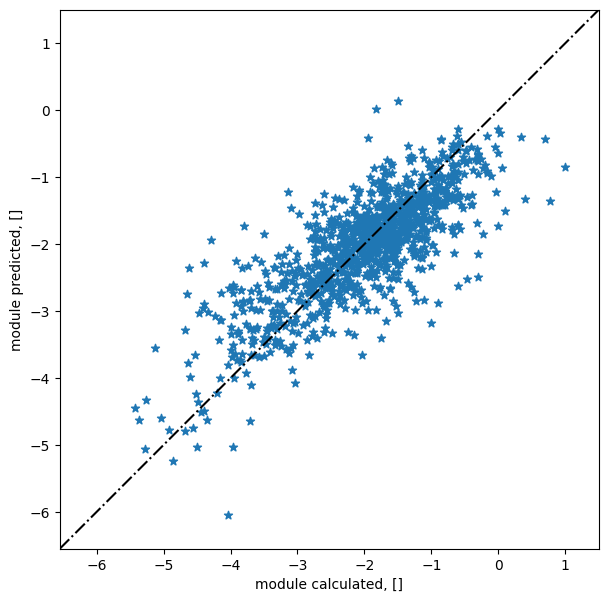

In [99]:
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
print(get_regression_metrics(y_test, xgb.predict(X_test)))
reg_plot(y_test, xgb.predict(X_test), label='module')

{'R^2': 0.57, 'MAE': 0.477, 'RMSE': 0.652}


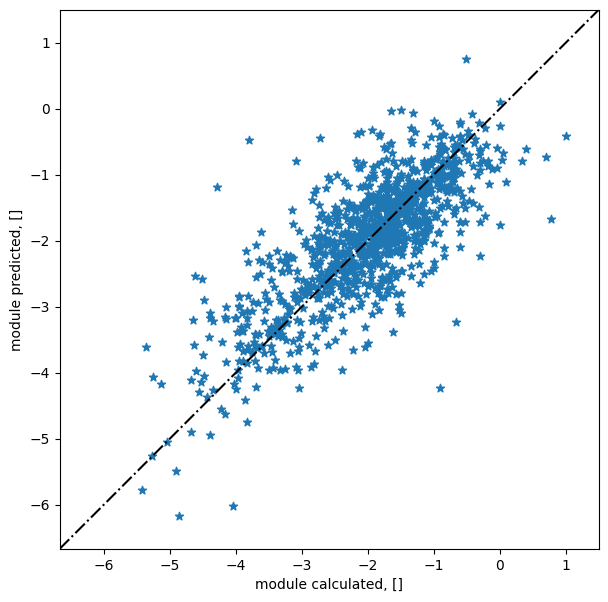

In [82]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(random_state=1234, max_iter=1000)
mlp.fit(X_train, y_train)
print(get_regression_metrics(y_test, mlp.predict(X_test)))
reg_plot(y_test, mlp.predict(X_test), label='module')

In [83]:
# Добавление дубликатов с наиболее близкими свойствами
dupl_data = pd.read_csv(os.path.join(path, "HDAC6_clear_all_dupl.tsv"), sep='\t')
dupl_data

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\kiril\\Desktop\\10.2 семестр\\хакатон спб\\HDAC6_clear_all_dupl.tsv'

In [ ]:
dupl_data_molecules = [Chem.MolFromSmiles(mol) for mol in dupl_data["Ligand SMILES"]]
dupl_data_fingerprints = [list(fpgen.GetFingerprint(mol)) for mol in dupl_data_molecules]
dupl_data_prediction = best_rf.predict(dupl_data_fingerprints)
predictions = pd.DataFrame({"prediction": dupl_data_prediction})
predictions

In [ ]:
dupl_data = pd.concat([dupl_data, predictions], axis=1)
dupl_data

In [ ]:
import numpy as np
for molecule in set(dupl_data[mol_column]):
  if molecule not in data[mol_column]:
    molecule_table = dupl_data[dupl_data[mol_column] == molecule]
    mol_props = np.array(molecule_table[target_column])
    pred_props = np.array(molecule_table["prediction"])
    prop_differences = np.abs(mol_props - pred_props)
    best_prop = mol_props[np.argmin(prop_differences)]
    dupl_data = dupl_data[dupl_data["Ligand SMILES"] != molecule]
    dupl_data = pd.concat([dupl_data, pd.DataFrame({"Ligand SMILES": [molecule], "pIC50": [best_prop], "prediction": pred_props[0]})], ignore_index=True)
dupl_data

In [ ]:
molecules_after_duplicate = [Chem.MolFromSmiles(x) for x in dupl_data[mol_column]]
fingerprints_after_duplicate = [list(fpgen.GetFingerprint(molecule)) for molecule in molecules_after_duplicate]
target_prop = dupl_data[target_column]

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fingerprints_after_duplicate, target_prop, test_size=0.2, random_state=42)

NameError: name 'fingerprints_after_duplicate' is not defined

{'R^2': 0.641, 'MAE': 0.435, 'RMSE': 0.596}


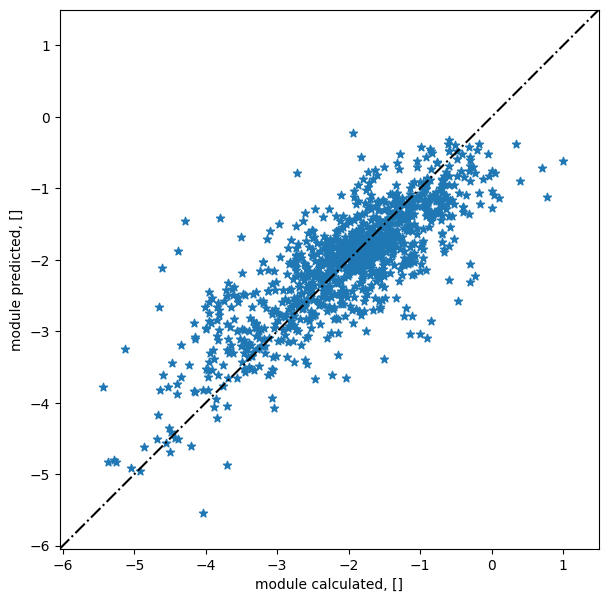

In [87]:
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
print(get_regression_metrics(y_test, xgb.predict(X_test)))
reg_plot(y_test, xgb.predict(X_test), label='module')

In [88]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500]
}

xgb = XGBRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

Fitting 5 folds for each of 27 candidates, totalling 135 fits


{'R^2': 0.657, 'MAE': 0.423, 'RMSE': 0.582}


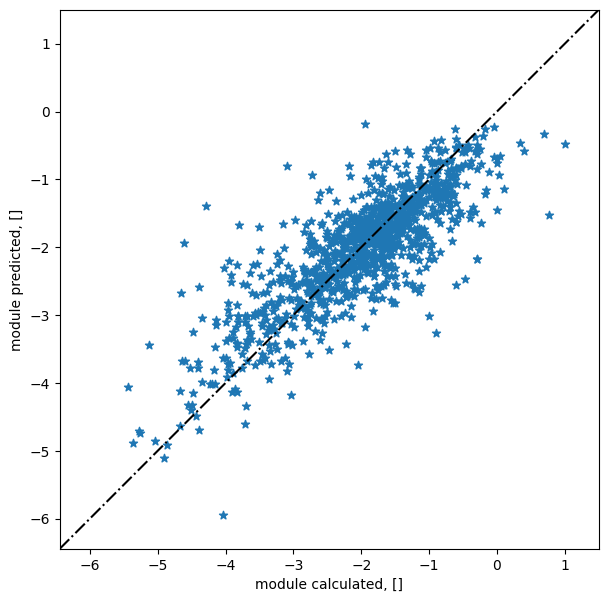

In [89]:
print(get_regression_metrics(y_test, best_rf.predict(X_test)))
reg_plot(y_test, best_rf.predict(X_test), label='module')

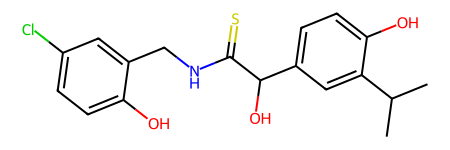

In [90]:
best_molecule = "CC(C)c1cc(C(O)C(=S)NCc2cc(Cl)ccc2O)ccc1O"
mol = Chem.MolFromSmiles(best_molecule)
mol

In [ ]:
fingers = list(fpgen.GetFingerprint(mol))
print(best_rf.predict([fingers]))